In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [122]:
import warnings
warnings.filterwarnings('ignore')

In [123]:
os.chdir('C:\\simran\\assignment\\solved\\Flight price pridiction')

In [124]:
data=pd.read_excel('Data_Train.xlsx')

In [125]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [127]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [128]:
data.dropna(how='any',inplace=True)

In [129]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [130]:
data[data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [131]:
data.drop_duplicates(inplace=True)

In [132]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [133]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [134]:
data['Date_of_Journey']=pd.to_datetime(data['Date_of_Journey'])

In [135]:
data.dtypes['Date_of_Journey']

dtype('<M8[ns]')

In [136]:
data['Date_of_Journey'].dt.year

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: Date_of_Journey, Length: 10462, dtype: int32

In [137]:
data['Day_of_Journey']=(data['Date_of_Journey']).dt.day # Day column 
data['Month_of_Journey']=(data['Date_of_Journey']).dt.month # Month Column 
display(data)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [138]:
data.drop(["Date_of_Journey"],axis=1,inplace=True)
display(data.head())

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [139]:
data['Dep_hr']=pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min']=pd.to_datetime(data['Dep_Time']).dt.minute
display(data.head())

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [140]:
data.drop(["Dep_Time"],axis=1,inplace=True)
display(data.head())

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [141]:
data['Arrival_hr']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min']=pd.to_datetime(data['Arrival_Time']).dt.minute
display(data.head())

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [142]:
data.drop(["Arrival_Time"],axis=1,inplace=True)
display(data.head())

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [143]:
display (data['Duration'])

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10462, dtype: object

In [144]:
duration=data['Duration'].str.split(' ',expand=True) 
display (duration)

,0,1
0,2h,50m
1,7h,25m
2,19h,None
3,5h,25m
4,4h,45m
...,...,...
10678,2h,30m
10679,2h,35m
10680,3h,None
10681,2h,40m


In [145]:
duration[1].fillna('00m',inplace=True)

In [146]:
data['duration_hr']=duration[0].apply (lambda x: x[:-1])

In [147]:
data['duration_min']=duration[1].apply(lambda x: x[:-1]) 

In [158]:
data.drop('Duration',axis=1,inplace=True)

In [159]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [161]:
data

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [162]:
data.dtypes

Airline             object
Source              object
Destination         object
Total_Stops         object
Price                int64
Day_of_Journey       int32
Month_of_Journey     int32
Dep_hr               int32
Dep_min              int32
Arrival_hr           int32
Arrival_min          int32
duration_hr          int32
duration_min         int32
dtype: object

In [163]:
data['duration_hr']=data['duration_hr'].astype(int)

In [164]:
data['duration_min']=data['duration_min'].astype(int)

In [165]:
data.dtypes

Airline             object
Source              object
Destination         object
Total_Stops         object
Price                int64
Day_of_Journey       int32
Month_of_Journey     int32
Dep_hr               int32
Dep_min              int32
Arrival_hr           int32
Arrival_min          int32
duration_hr          int32
duration_min         int32
dtype: object

In [166]:
data['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

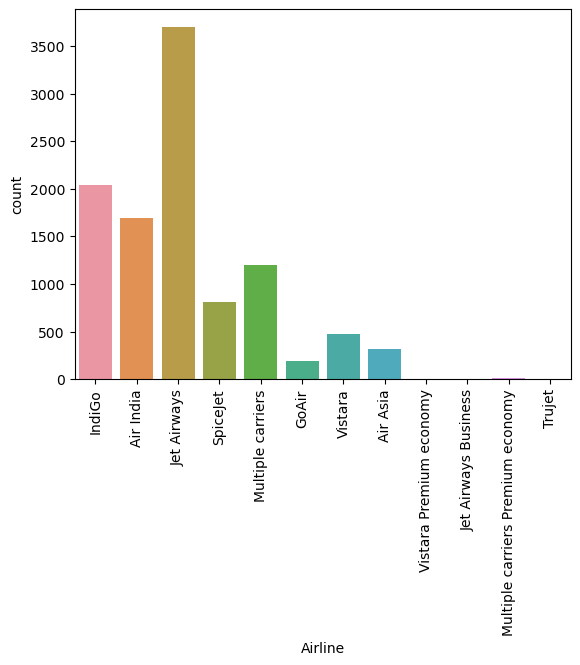

In [167]:
sns.countplot(x=data['Airline']).set_xticklabels(labels=sns.countplot(x=data['Airline']).get_xticklabels(),rotation=90)
plt.show()


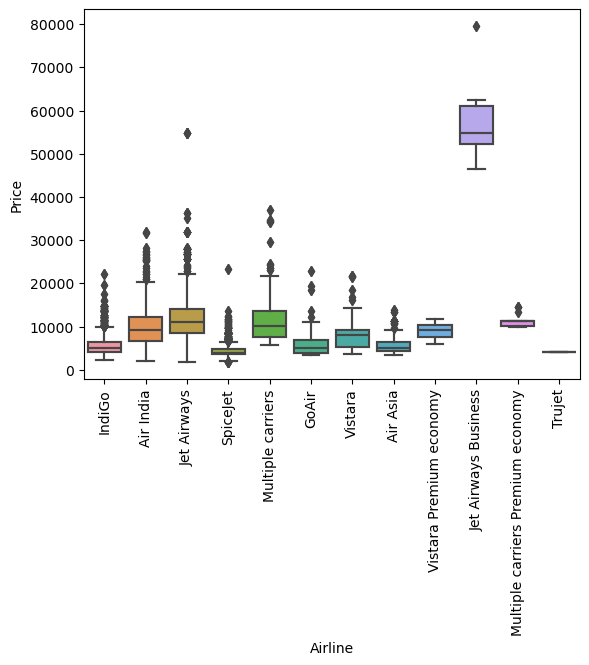

In [168]:
sns.boxplot(x='Airline',y='Price',data=data).set_xticklabels(labels=sns.boxplot(x='Airline',y='Price',data=data).get_xticklabels(),rotation=90)
plt.show()

In [169]:
data.groupby(['Airline','Total_Stops']).agg({'Price':np.sum})

Price
Airline                           Total_Stops          
Air Asia                          1 stop         913104
                                  2 stops         57077
                                  non-stop       813112
Air India                         1 stop        4882415
                                  2 stops       8527096
                                  3 stops        431867
                                  4 stops         17686
                                  non-stop      2329830
GoAir                             1 stop         702237
                                  non-stop       434808
IndiGo                            1 stop        5634041
                                  2 stops        142643
                                  non-stop      5804000
Jet Airways                       1 stop       31719799
                                  2 stops       7356734
                                  non-stop      3839845
Jet Airways Business              1 stop         251377
                                  2 stops         98775
Multiple carriers                 1 stop       12264457
                                  2 stops        636804
                                  3 stops        138342
Multiple carriers Premium economy 1 stop         148445
SpiceJet                          1 stop         999083
                                  non-stop      2534628
Trujet                            1 stop           4140
Vistara                           1 stop        2072847
                                  non-stop      1656201
Vistara Premium economy           non-stop        26887

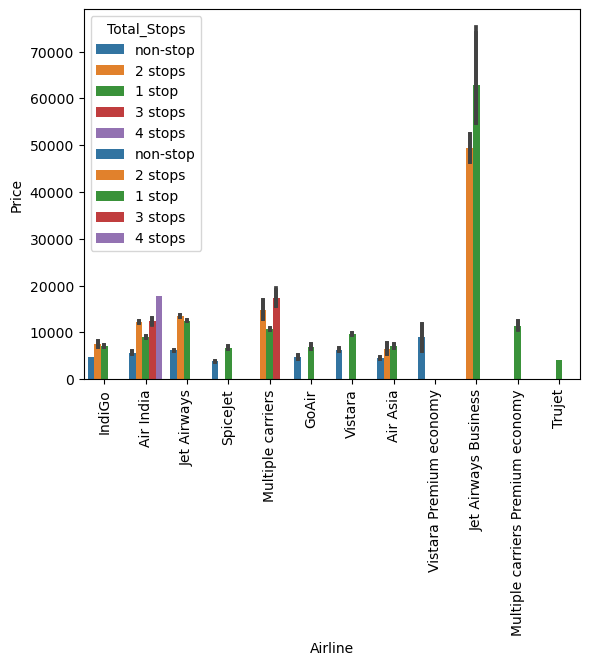

In [170]:
sns.barplot(x='Airline',y='Price',hue='Total_Stops',data=data).set_xticklabels(labels=sns.barplot(x='Airline',y='Price',hue='Total_Stops',data=data).get_xticklabels(),rotation=90)
plt.show()

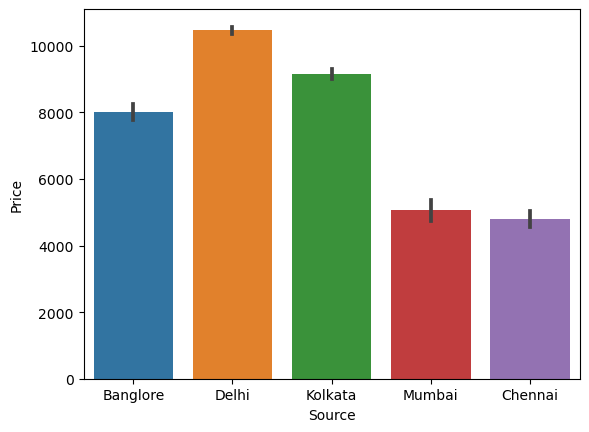

In [171]:
sns.barplot(y='Price',x='Source',data=data.sort_values('Price',ascending=False))
plt.show()


In [172]:
data['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [173]:
data['Destination'].replace('New Delhi','Delhi',inplace=True)

In [174]:
data['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        2179
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

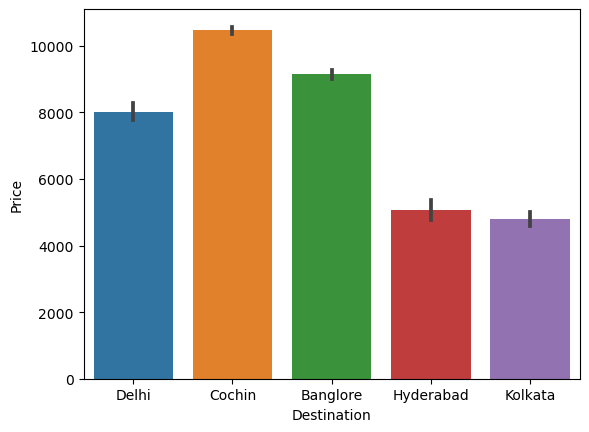

In [175]:
sns.barplot(y='Price',x='Destination',data=data.sort_values('Price',ascending=False))
plt.show()

In [176]:
data_corr=data.iloc[:,5:]
display (data_corr)

,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,24,3,22,20,1,10,2,50
1,1,5,5,50,13,15,7,25
2,9,6,9,25,4,25,19,0
3,12,5,18,5,23,30,5,25
4,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...
10678,9,4,19,55,22,25,2,30
10679,27,4,20,45,23,20,2,35
10680,27,4,8,20,11,20,3,0
10681,1,3,11,30,14,10,2,40


<Axes: >

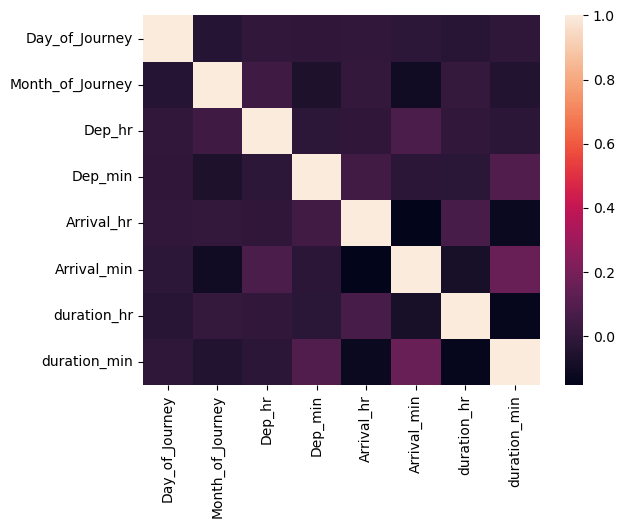

In [177]:
sns.heatmap(data_corr.corr())

In [178]:
data['Total_Stops']=data['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
display (data.head(4))


,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25


In [179]:
data.shape

(10462, 13)

In [180]:
air_dummy=pd.get_dummies(data['Airline'],drop_first=True, dtype = int)
display (air_dummy)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [181]:
source_dest_dummy=pd.get_dummies(data[['Source','Destination']],drop_first=True, dtype = int)
display (source_dest_dummy)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0
2,0,1,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
10678,0,0,1,0,0,0,0,0
10679,0,0,1,0,0,0,0,0
10680,0,0,0,0,0,1,0,0
10681,0,0,0,0,0,1,0,0


In [182]:
data=pd.concat([air_dummy,source_dest_dummy,data],axis=1)
display (data.head(4))

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,2,13882,9,6,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,...,1,6218,12,5,18,5,23,30,5,25


In [183]:
data.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [184]:
data

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,2,13882,9,6,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,...,1,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,0,4107,9,4,19,55,22,25,2,30
10679,1,0,0,0,0,0,0,0,0,0,...,0,4145,27,4,20,45,23,20,2,35
10680,0,0,0,1,0,0,0,0,0,0,...,0,7229,27,4,8,20,11,20,3,0
10681,0,0,0,0,0,0,0,0,0,1,...,0,12648,1,3,11,30,14,10,2,40


In [104]:
pip install flask_cors

Note: you may need to restart the kernel to use updated packages.


In [105]:
df_test=pd.read_excel("Test_set.xlsx")
display(df_test)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [106]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'],format='%d/%m/%Y')
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

In [107]:
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute


In [108]:
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute


In [109]:
a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])


In [110]:
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

In [111]:
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

In [112]:
air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True,dtype = int)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True,dtype = int)


In [113]:
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)

In [114]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)
display (df_test.head(4))


,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,...,Destination_New Delhi,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,dur_hr,dur_min
0,0,0,0,1,0,0,0,0,0,0,...,0,1,6,6,17,30,4,25,10,55
1,0,0,1,0,0,0,0,0,0,0,...,0,1,12,5,6,20,10,20,4,00
2,0,0,0,1,0,0,0,0,0,0,...,0,1,21,5,19,15,19,0,23,45
3,0,0,0,0,0,1,0,0,0,0,...,0,1,21,5,8,0,21,0,13,00


In [186]:
print('train_shape',data.shape)

train_shape (10462, 29)


In [116]:
print('test_shape',df_test.shape)

test_shape (2671, 28)


In [185]:
data.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey', 'Dep_hr',
       'Dep_min', 'Arrival_hr', 'Arrival_min', 'duration_hr', 'duration_min'],
      dtype='object')

In [120]:
df_test.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Total_Stops', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'dur_hr', 'dur_min'],
      dtype='object')

In [187]:
x=df.drop('Price',axis=1)
y=df['Price']

In [188]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)

ExtraTreesRegressor()

In [190]:
y_et_predict=ET_Model.predict(x)
display (r2_score(y,y_predict))

0.963390661607659

<Axes: >

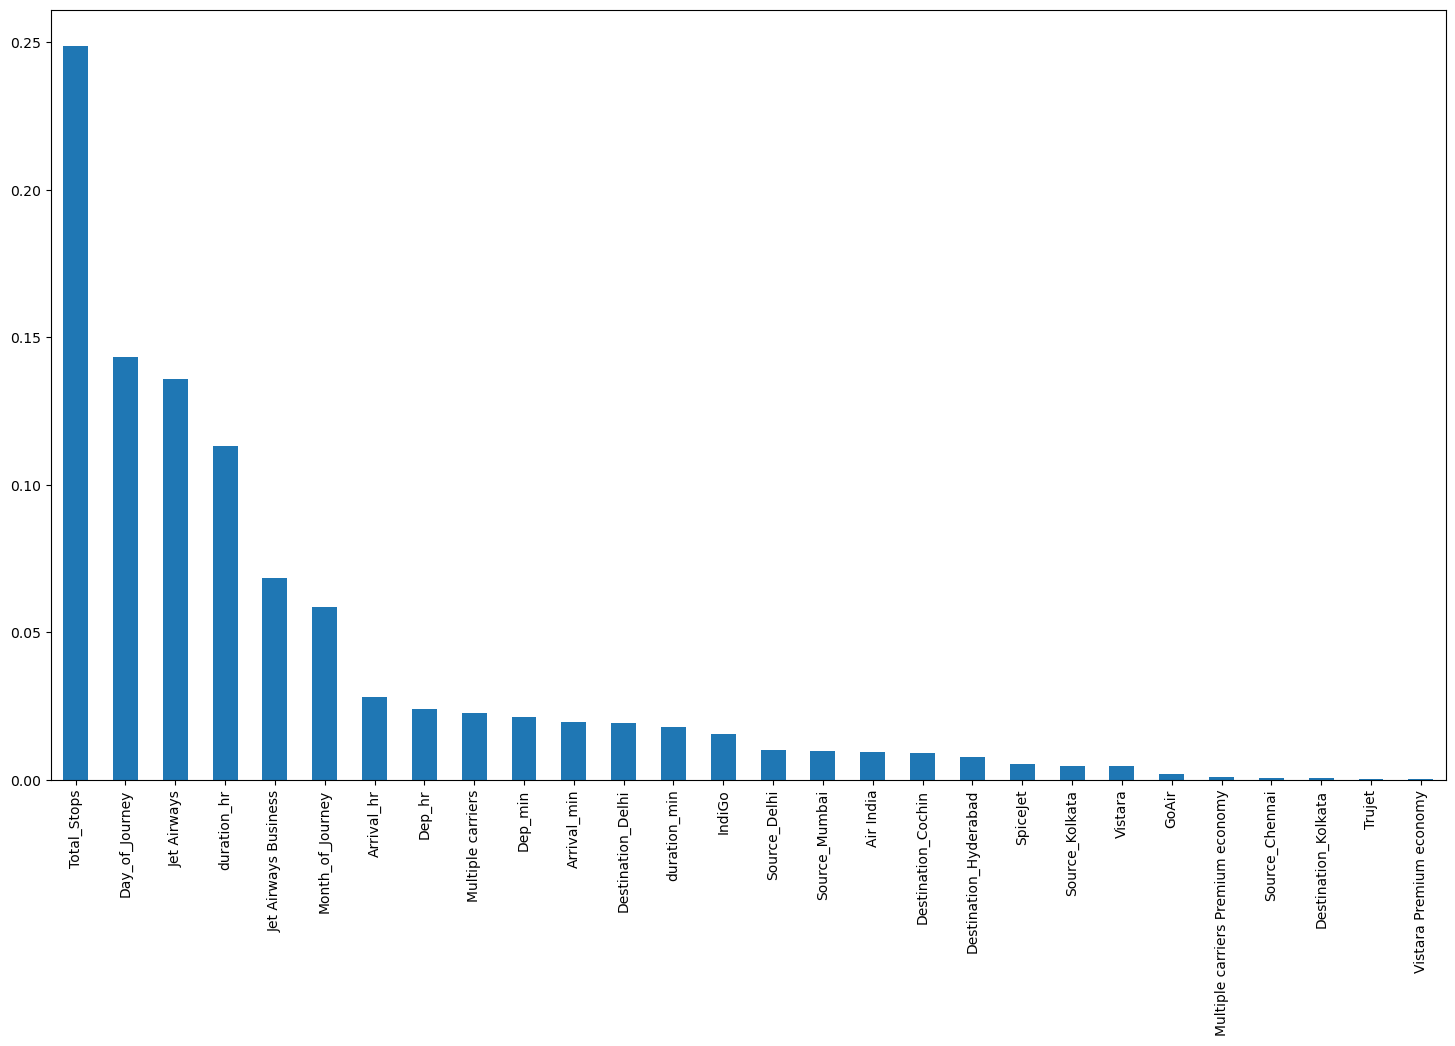

In [191]:
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

In [192]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [193]:
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)


ExtraTreesRegressor(n_estimators=120)

In [197]:
y_et2_predict=ET_Model.predict(X_test)
from sklearn.metrics import r2_score
display (r2_score(y_test,y_et2_predict))
print(ET_Model.score(X_train,y_train))

0.7890353681268577

0.9707143631275513


In [200]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
print(r2_score(y_test,y_predict))
print(RF_Model.score(X_train,y_train))

0.8205651323983657
0.9537855679836608


In [211]:
param={'n_estimators':[int(x) for x in np.linspace(80,1500,10)],
       'max_features': ['auto','sqrt'],
        'max_depth':[int(x) for x in np.linspace(6,45,5)],
       'min_samples_split':[2,5,10,15,100],
       'min_samples_leaf':[1,2,5,10]}

In [212]:
rf=RandomForestRegressor()
from sklearn.model_selection import RandomizedSearchCV
rcv=RandomizedSearchCV(estimator=rf,param_distributions=param,n_iter=10,scoring='neg_mean_squared_error',random_state=42,cv=3,n_jobs=-1)

In [213]:
rcv.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 237, 395, 553, 711,
                                                         868, 1026, 1184, 1342,
                                                         1500]},
                   random_state=42, scoring='neg_mean_squared_error')

In [214]:
display (rcv.best_params_)

{'n_estimators': 1342,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 45}

In [216]:
display (rcv.best_estimator_)

RandomForestRegressor(max_depth=45, max_features='auto', min_samples_split=15,
                      n_estimators=1342)

In [218]:
rf_pred=rcv.predict(X_test)
display (rf_pred)
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

array([ 9089.02165542,  5686.58865186,  8375.80185379, ...,
       12364.60624073,  3697.70800509,  6939.48851428])

MAE 1159.592624317199
MSE 3005771.048386442


In [219]:
display (r2_score(y_test,rf_pred))

0.8532074703106208

In [223]:
rf1=RandomForestRegressor(n_estimators= 1342,
 min_samples_split=15,
 min_samples_leaf=1,
 max_features='auto',
 max_depth= 45)
rf1.fit(X_train,y_train)

RandomForestRegressor(max_depth=45, max_features='auto', min_samples_split=15,
                      n_estimators=1342)

In [225]:
rf1_pred=rcv.predict(X_test)
display (rf1_pred)
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,rf1_pred))
print('MSE',mean_squared_error(y_test,rf1_pred))
display (r2_score(y_test,rf1_pred))
print(rf1.score(X_train,y_train))

array([ 9089.02165542,  5686.58865186,  8375.80185379, ...,
       12364.60624073,  3697.70800509,  6939.48851428])

MAE 1159.592624317199
MSE 3005771.048386442


0.8532074703106208

0.8958255718753841


In [228]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
display (r2_score(y_test,xgb_pred))


0.8504509155203822

In [236]:
display (r2_score(y_test,cat_pred))

0.8596289688357996

In [229]:
import pickle

In [240]:
pickle.dump(rf1,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))